<div style="font-family: 'Palatino Linotype', 'Book Antiqua', serif;
            font-size: 24px; 
            color: #1E90FF;   /* biru estetik */
            font-weight: bold; 
            text-align: center; 
            letter-spacing: 1px;">
   Baca Data csv
</div>


In [2]:
import pandas as pd
import numpy as np

df= pd.read_csv("Data_Regresi.csv")
df.head()

,TIME,Promo(X1),Karyawan(X2),Jual(Y)
0,1,248,42,1705
1,2,210,35,1682
2,3,207,32,1663
3,4,153,33,1628
4,5,169,28,1650


<div style="font-family: 'Palatino Linotype', 'Book Antiqua', serif;
            font-size: 24px; 
            color: #1E90FF;   /* biru estetik */
            font-weight: bold; 
            text-align: center; 
            letter-spacing: 1px;">
 Regresi Sederhana
</div>

alpha = 1673.7105263157894
beta = -1.4676691729323308


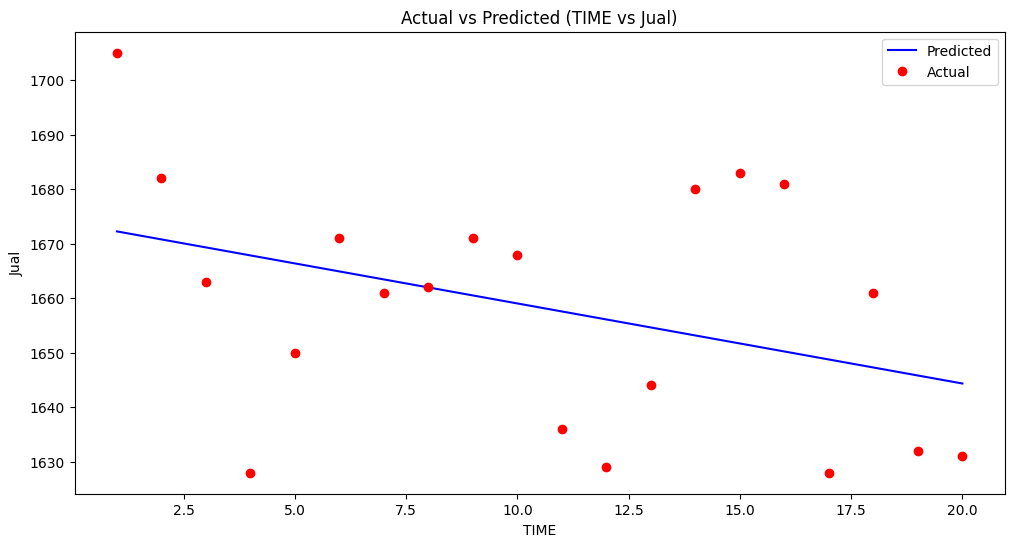

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Baca data dari CSV
df = pd.read_csv("Data_Regresi.csv")

# Ubah nama kolom agar mudah digunakan
df.columns = ["TIME", "Promo", "Karyawan", "Jual"]

# Ambil variabel x dan y
x = df["TIME"]
y = df["Jual"]

# Masukkan ke DataFrame baru
data = pd.DataFrame({
    "x1": x,
    "y": y
})

# Hitung mean
xmean = np.mean(x)
ymean = np.mean(y)

# Hitung covariance dan variance
data["xycov"] = (data["x1"] - xmean) * (data["y"] - ymean)
data["xvar"] = (data["x1"] - xmean)**2

# Hitung beta & alpha
beta = data["xycov"].sum() / data["xvar"].sum()
alpha = ymean - (beta * xmean)
print(f"alpha = {alpha}")
print(f"beta = {beta}")

# Prediksi
ypred = alpha + beta * x

# Plot
plt.figure(figsize=(12, 6))
plt.plot(x, ypred, label="Predicted", color="blue")
plt.plot(x, y, "ro", label="Actual")
plt.title("Actual vs Predicted (TIME vs Jual)")
plt.xlabel("TIME")
plt.ylabel("Jual")
plt.legend()
plt.show()

<div style="font-family: 'Palatino Linotype', 'Book Antiqua', serif;
            font-size: 24px; 
            color: #1E90FF;   /* biru estetik */
            font-weight: bold; 
            text-align: center; 
            letter-spacing: 1px;">
  Visualisasi (Scatter Plot 3D)
</div>

In [4]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Baca data dari CSV
df = pd.read_csv("Data_Regresi.csv")

# Ubah nama kolom agar mudah digunakan
df.columns = ["TIME", "Promo", "Karyawan", "Penjualan"]

# Ambil variabel regresi
x1 = df["Promo"]
x2 = df["Karyawan"]
y = df["Penjualan"]

# Buat DataFrame baru
data = pd.DataFrame({
    "x1": x1,
    "x2": x2,
    "y": y
})

# Analisis regresi berganda
X = sm.add_constant(data[["x1", "x2"]])
model = sm.OLS(data["y"], X).fit()

# Koefisien regresi
koefisien = model.params

# Scatter plot 3D
scatter_plot = go.Scatter3d(
    x=data["x1"],
    y=data["x2"],
    z=data["y"],
    mode="markers",
    marker=dict(
        size=5,
        color="blue",
        opacity=0.8
    ),
    name="Data"
)

# Membuat grid untuk permukaan regresi
x1_grid, x2_grid = np.meshgrid(
    np.linspace(data["x1"].min(), data["x1"].max(), 10),
    np.linspace(data["x2"].min(), data["x2"].max(), 10)
)
y_pred = koefisien.iloc[0] + koefisien.iloc[1] * x1_grid + koefisien.iloc[2] * x2_grid

# Permukaan regresi 3D
regresion_surface = go.Surface(
    x=x1_grid,
    y=x2_grid,
    z=y_pred,
    colorscale="Reds",
    opacity=0.5,
    name="Garis Regresi"
)

# Layout plot
layout = go.Layout(
    title="Scatter Plot 3D dengan Garis Regresi Berganda",
    scene=dict(
        xaxis_title="Promo (X1)",
        yaxis_title="Karyawan (X2)",
        zaxis_title="Penjualan (Y)"
    ),
    showlegend=True
)

# Buat figure dan tampilkan
fig = go.Figure(data=[scatter_plot, regresion_surface], layout=layout)
fig.show()